<img src="Figures/logo_trans.png" width="180px" alt="LyonHPC" />
<img width="200px" src="Figures/python-logo.gif" alt="LyonHPC"/>

# Gestion de fichiers et E/S

<img src="Figures/python_file.png" width="300px" />

In [1]:
%matplotlib inline
import numpy as np
from IPython.display import HTML,display,IFrame
from IPython.display import YouTubeVideo,Markdown,Video

## Fichier informatique

**définition (Wikipédia)**
un fichier informatique est  une collection d'informations numériques (séquences d'octets) réunies sous un même nom, enregistrées sur un support de stockage tel qu'un disque dur, un CD-ROM, une clé USB ...

En vue de faciliter leur organisation, les fichiers sont disposés dans des systèmes de fichiers qui permettent de placer les fichiers dans des emplacements appelés répertoires ou dossiers eux-mêmes organisés selon le même principe de manière à former une hiérarchie arborescente

Sur le système de l'ordinateur, un fichier est repéré par son nom avec éventuellement une extension et le répertoire dans lequel il se trouve.

En calcul scientifique, on considère 2 types principaux de fichiers:

- des fichiers de **programmes** qui contiennent un code informatique exécutable par l'ordinateur, sous 2 formes principales:

   - fichiers **exécutables** qui contiennent un code binaire directement exécutable par le processeur (extension **.exe** sous windows). Ces programmes ne sont pas modifiables et sont propre à l'ordinateur utilisé (programmes commerciaux ou propriétaires)
   - fichiers **sources** qui contiennent le code source du programme dans un langage de programmation (extension **.py** pour les programmes Python). Ces programmes peuvent être modifiés et être exécuter sur n'importe quel ordinateur.
  

- des fichiers de **données** qui contiennent des données (data) crées et manipulées par les programmes, sous 2 formes principales:

   - des fichiers **binaires** qui contiennent l'information brute, utilisant le codage de l'ordinateur (le plus efficace pour le stockage)
   - des fichiers **textes** qui contiennent les données écrites sous forme de lignes de texte (format le plus simple à manipuler)
 
 Dans la suite on ne considérera que les fichiers programmes Python (extension .py) et des fichiers de données textes (extension .dat).
 
 Pour éviter des problèmes de compatibilités entre systèmes informatiques, on choisira des noms de fichiers sans caractères accentués, sans espace ni caractéres spéciaux (autre que **.** ou **_** ou **-** ) 

## Fichier de programme (ou script) sous Python

un fichier contenant un programme Python a par convention une extension **.py**. Un simple éditeur de texte (notepad sous Windows) suffit pour créer et modifier un programme Python

- **gedit** ["voir le site gedit"](http://wiki.gnome.org/Apps/Gedit) un éditeur simple et efficace
- **vim** et variante ["soir le site vim"](http://wiki.python.org/moin/Vim) un éditeur de référence pour les programmeurs
- **spyder** ["voir le site spyder"](http://pythonhosted.org/spyder/) un environnement de développement Python à la matlab pour les applications scientifiques. *Sous Spyder, on utilisera plutôt la console Ipython pour exécuter les programmes, que la console par défaut qui utilise des conventions matlab différentes d'un interpréteur Python classique*.

### Exemple: trace de courbes de Lissajous

Une courbe de Lissajous (d'après le physicien français ["Jules Antoine Lissajous"](http://fr.wikipedia.org/wiki/Jules_Lissajous])) est une courbe paramétrique du plan dont les composantes sont des fonctions périodiques du paramètre (en générale le temps en physique, et que l'on peut observer avec un oscilloscope).

Le programme Python suivant **lissajous.py** trace les courbes de Lissajous suivantes

\begin{eqnarray} 
x(t) &=&  \sin{(\frac{2\pi}{p} t)}\\
y(t) &=&  \sin{(\frac{2\pi}{q} t + \phi)}
\end{eqnarray}

Le rapport $n=\frac{p}{q}$ est le paramètre de la courbe et $\phi$ le déphassage. Le temps $T$ de parcours de la courbe est le plus petit commun multiple de $p$ et $q$:
$$T=pcm(p,q)=\frac{pq}{pgcd(p,q)}$$

#### fichier lissajous.py

In [2]:
%%bash --err /dev/null
ls -al lissajous.py
cat lissajous.py

-rwxrwxr-x 1 buffat buffat 1659 janv. 27  2018 lissajous.py
#! /usr/bin/env python
# -*- coding: utf-8 -*-
"""
    tracer de courbe de Lissajous
    d'après https://sites.google.com/site/sdcoding/python/physics-with-python
    @author: marc buffat
"""
import numpy as np
import matplotlib.pyplot as plt

def pgcd(a, b):
    """calcul du pgcd de a et b par l'algorithme d'Euclide."""
    while b:
        a, b = b, a % b
    return a

def lcm(a, b):
    """calcul du plus petit commun multiple."""
    return a * b // pgcd(a, b)

def Lissajous(p,q,phi,N):
    """ calcul de N points d'une courbe de Lissajous"""
    omega1 = 2*np.pi/p
    omega2 = 2*np.pi/q
    # temps d'étude
    T = p*q/pgcd(p,q)
    t = np.linspace(0., T, N)
    # equations parametriques
    x = np.sin(omega1*t)
    y = np.sin(omega2*t+phi)
    return t,x,y

def LissajousFigure(p,q,phi):
    """ trace de courbe de lissajous
        p,q : parametres entiers des courbes x(t),y(t)
        phi: déphasage
    """
    # pulsation 

#### exécution du programme

In [3]:
%%bash --err /dev/null
echo "execution avec interpreteur python"
python lissajous.py
ls -al lissajous.png

execution avec interpreteur python
-rw-rw-r-- 1 buffat buffat 97716 janv. 27  2018 lissajous.png


In [4]:
%%bash --err /dev/null
echo "execution automatique"
chmod +x lissajous.py
./lissajous.py
ls -al lissajous.png

execution automatique
-rw-rw-r-- 1 buffat buffat 97716 janv. 27  2018 lissajous.png


In [8]:
# execution dans une cellule
%run lissajous.py

#### utilisation en tant que module (ou librairie)

**module**  fichier contenant des fonctions et des définitions en python (bibliothèque)

**nom du module** nom du fichier sans l'extension .py

**utilisation** du module mon_module.py

    import mon_module
    import mon_module as mn
    from mom_module import ma_fonction
    from mon_module import *

In [10]:
from lissajous import pgcd,LissajousFigure
print(pgcd(21,9))
LissajousFigure(5,3,np.pi/2)

3


**rem** si votre bibliothèque n'est pas dans le répertoire courant, il faudra 
alors spécifier son chemin d’accès (path) (voir documentation Python)

## Fichier de données sous Python

Comme dans la pluspart des langages informatiques, lire ou écrire dans un fichier, on va associer à un fichier (à son nom) une variable informatique de type **file**, qui posséde des fonctions (ou méthodes) permettant de lire ou écrire des données dans le fichier.

###  fonction de lecture/écriture

- ouverture d'un fichier *mon_fichier.dat* en lecture:
        f=open("nom_fichier.dat",'r')
- ou en écriture:
        f=open("nom_fichier.dat",'w')
- lecture / ecriture (caractères)
        f.read(n) ou f.readline() 
        f.write(chaine)
- lecture / écriture de tableaux (numpy)
        A=loadtxt(file (ou nom de fichier))
        savetxt(file (ou nom de fichier), A)   
- fermeture du fichier
        f.close()

### Exemple: écriture de données

écriture sur fichiers de $n$  points d'une courbe de Lissajous avec le format suivant 

    # ligne de commentaire
    # n
    t0 x0 y0
    .......
    ti xi yi
    .......
    tn-1 xn-1 yn-1
                
#### Programme Python

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from lissajous import Lissajous
# calcul des points
p=1; q=2; 
N=50
t,x,y=Lissajous(p,q,np.pi/2,N)
# mise sur fichier
F=open("lissajous.dat","wb")
F.write(str.encode("# courbe de lissajous avec p=%d q=%d\n"%(p,q)))
F.write(str.encode("# %d\n"%(N)))
np.savetxt(F,np.transpose([t,x,y]))
F.close()

In [12]:
%%bash --err /dev/null
ls -al lissajous.dat
cat lissajous.dat

-rw-rw-r-- 1 buffat buffat 3839 avril  6 22:56 lissajous.dat
# courbe de lissajous avec p=1 q=2
# 50
0.000000000000000000e+00 0.000000000000000000e+00 1.000000000000000000e+00
4.081632653061224164e-02 2.536545839095073474e-01 9.917900138232461638e-01
8.163265306122448328e-02 4.907175520039378513e-01 9.672948630390294511e-01
1.224489795918367319e-01 6.956825506034863826e-01 9.269167573460217469e-01
1.632653061224489666e-01 8.551427630053460849e-01 8.713187041233895203e-01
2.040816326530612013e-01 9.586678530366605777e-01 8.014136218679566159e-01
2.448979591836734637e-01 9.994862162006878936e-01 7.183493500977276014e-01
2.857142857142856984e-01 9.749279121818236193e-01 6.234898018587335944e-01
3.265306122448979331e-01 8.865993063730001067e-01 5.183925683105251592e-01
3.673469387755101678e-01 7.402779970753157190e-01 4.047833431223940570e-01
4.081632653061224025e-01 5.455349012105490392e-01 2.845275866310327251e-01
4.489795918367346372e-01 3.151082180236212671e-01 1.595998950333795963e-01

### Exemple: lecture de données

lecture des données précédentes et tracer de la courbe

lecture des données taille= (50, 3)


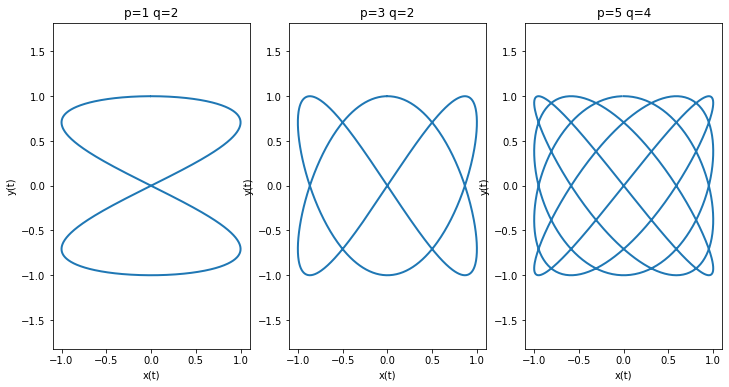

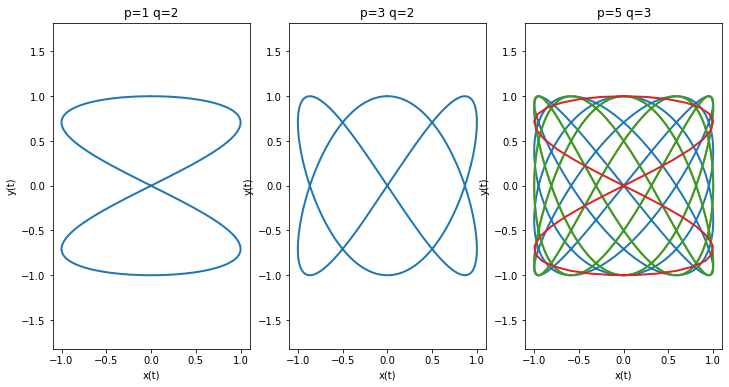

In [13]:
import numpy as np
import matplotlib.pyplot as plt

A=np.loadtxt("lissajous.dat")
print("lecture des données taille=",A.shape)
x=A[:,1]
y=A[:,2]
# tracer
plt.plot(x,y,lw=2)
plt.show()

### Lecture d'un fichier ligne par ligne

In [14]:
F=open("lissajous.dat","r")
nlines=0
nval=0
for line in F:
    if line[0] != "#" :
        nval = nval + 1
    nlines = nlines + 1
F.close()
print("nbre de lignes lues =",nlines," nbre de valeurs =",nval)

nbre de lignes lues = 52  nbre de valeurs = 50


### Ecriture format CSV

le format CSV (Comma-Separated Values) permet de partagé les données avec un tableur (localc, excel). Il suffit de délimiter les données avec une '**,**'. 

**Attention:** *pour un tableur francisé, il faut lire le fichier avec l'option langue=US pour une conversion correcte des nombres réels. Python (comme beaucoup de langage informatique) utilise le point (cad la convention anglo-saxonne) et non la virgule pour représenter un nombre réel*.

In [15]:
np.savetxt("lissajous.csv",np.transpose([t,x,y]),delimiter=",")

In [16]:
%%bash --err /dev/null
ls -al lissajous.csv
cat lissajous.csv

-rw-rw-r-- 1 buffat buffat 3799 avril  6 22:59 lissajous.csv
0.000000000000000000e+00,0.000000000000000000e+00,1.000000000000000000e+00
4.081632653061224164e-02,2.536545839095073474e-01,9.917900138232461638e-01
8.163265306122448328e-02,4.907175520039378513e-01,9.672948630390294511e-01
1.224489795918367319e-01,6.956825506034863826e-01,9.269167573460217469e-01
1.632653061224489666e-01,8.551427630053460849e-01,8.713187041233895203e-01
2.040816326530612013e-01,9.586678530366605777e-01,8.014136218679566159e-01
2.448979591836734637e-01,9.994862162006878936e-01,7.183493500977276014e-01
2.857142857142856984e-01,9.749279121818236193e-01,6.234898018587335944e-01
3.265306122448979331e-01,8.865993063730001067e-01,5.183925683105251592e-01
3.673469387755101678e-01,7.402779970753157190e-01,4.047833431223940570e-01
4.081632653061224025e-01,5.455349012105490392e-01,2.845275866310327251e-01
4.489795918367346372e-01,3.151082180236212671e-01,1.595998950333795963e-01
4.897959183673469274e-01,6.407021998071

## Entrée Sortie en python

### Lecture au clavier
lecture au clavier **input** d'une valeur sans conversion

    val = input("message")

ensuite on doit faire une conversion 

    val = int(input("entier ="))
    print(val,type(val))
    chaine = input("chaine =")
    print(chaine,type(chaine))
    
    entier =1
    1 <class 'int'>
    chaine =1
    1 <class 'str'>    

### Écriture avec formatage (mise en forme)

    print(format%(val1,val2,..)
**format** est une chaîne de caractères contenant des champs **%[n][t]** 

- n = entier optionnel spécifiant la largueur (en colonnes) du champ
- t  spécifie le type du champ: **d**=entier (décimal), **f**=réel (float) , **e**=réel avec exposant, **g**=réel (format général),  **s**=chaîne (string)

In [19]:
i=1425
print("i=%d i=%8d"%(i,i))
x=3242.627
print("x=%15f x=%12.4e x=%g"%(x,x,x))
ch="chaine"
print("ch1=%s ch2=%8s"%(ch,ch))

i=1425 i=    1425
x=    3242.627000 x=  3.2426e+03 x=3242.63
ch1=chaine ch2=  chaine


### format avec python 3

    string.format(var1,var2,..)
 
 où string est une chaine avec des {} pour spécifier la position des variables 

In [20]:
print("i={}  x={}".format(i,x))

i=1425  x=3242.627


## Référence

### Programme Python Lissajous

In [ ]:
import numpy as np

def pgcd(a, b):
    """calcul du pgcd de a et b par l'algorithme d'Euclide."""
    while b:
        a, b = b, a % b
    return a

def Lissajous(p,q,phi,N):
    """ calcul de N points d'une courbe de Lissajous"""
    omega1 = 2*np.pi/p
    omega2 = 2*np.pi/q
    # temps d'étude
    T = p*q/pgcd(p,q)
    t = np.linspace(0., T, N)
    # equations parametriques
    x = np.sin(omega1*t)
    y = np.sin(omega2*t+phi)
    return t,x,y

## FIN de la leçon

<img src="Figures/python_file.png" width="300px" />